In [1]:
import sys

sys.path.append("..")

import itertools

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from cbdetect_py import CornerType, Params, boards_from_corners, find_corners
from ipywidgets import interact

from calibration.data.babelcalib.babelcalib import load_babelcalib
from calibration.features.visualization import show_boards, show_corners

%load_ext autoreload
%autoreload 2

In [22]:
path = "../features.pkl"
df = pd.read_pickle(path)

In [3]:
datasets = load_babelcalib("../data/BabelCalib")

In [19]:
@interact
def select_ds(i: int = (0, 41), train: bool = False, img_i: int = (0, 100)):
    ds = datasets[i]
    print(ds.name)

    subds = ds.train if train else ds.test
    entry = subds[img_i]

    img = entry.image
    display(img.resize((img.size[0] // 4, img.size[1] // 4)))

    params = Params()
    params.show_processing = False
    params.corner_type = CornerType.SaddlePoint

    img = np.array(entry.image)

    corners = find_corners(img, params)

    if corners.p:
        display(show_corners(img, corners).show("svg"))
    boards = boards_from_corners(img, corners, params)

    if boards:
        print("Found boards!")
        display(show_boards(img, corners, boards).update_layout(
    # autosize=False,
    # width=800,
    height=800,))
        # print([b.idx for b in boards])

interactive(children=(IntSlider(value=20, description='i', max=41), Checkbox(value=False, description='train')…

In [23]:
df

,corners,boards,dataset,subdataset,image
0,"[((699.1339627739783, 500.80784669114973), 0.1...",[],Kalibr/BF5M13720,train,0
1,"[((860.9468466901143, 389.4076078957001), 0.02...",[],Kalibr/BF5M13720,train,1
2,"[((580.4766942421737, 378.54412420065137), 0.1...",[],Kalibr/BF5M13720,train,2
3,"[((400.4545721617719, 347.2431178684283), 0.09...",[],Kalibr/BF5M13720,train,3
4,"[((418.99642213641863, 265.59818818749653), 0....",[],Kalibr/BF5M13720,train,4
...,...,...,...,...,...
1587,"[((418.06744652989073, 97.79365819420325), 0.0...",[],UZH/Snapdragon/outdoor_forward,test,10
1588,"[((409.6300578150419, 116.45691552646494), 0.0...",[],UZH/Snapdragon/outdoor_forward,test,11
1589,"[((607.7591391253085, 45.80983302403355), 0.01...",[],UZH/Snapdragon/outdoor_forward,test,12
1590,"[((627.522768863789, 139.00787723135792), 0.03...",[],UZH/Snapdragon/outdoor_forward,test,13


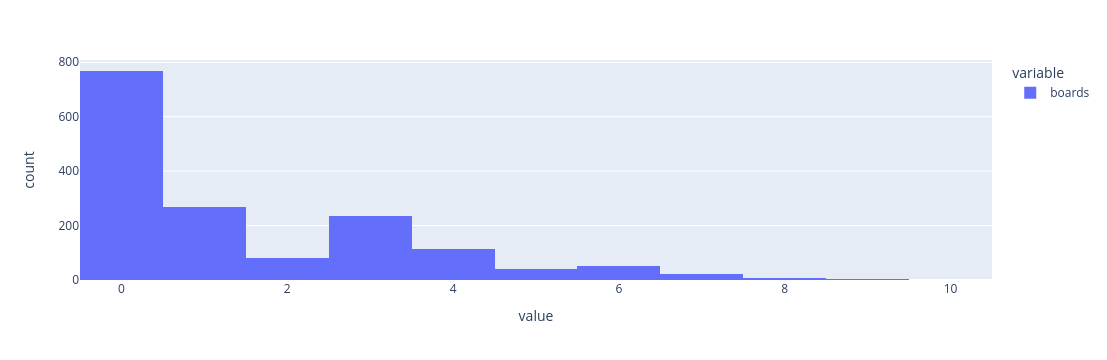

In [24]:
px.histogram(df["boards"].apply(len))

In [7]:
df[df["boards"].apply(len) != 0].shape

(824, 5)

In [8]:
df[df["boards"].apply(len) != 0]

,corners,boards,dataset,subdataset,image
38,"[((518.7628373418992, 143.94551088817886), 0.0...","[[[-1, -1, -1, -2, -2, -2, -1, -1], [-1, -1, -...",Kalibr/BF5M13720,test,3
66,"[((896.1811736335144, 292.1827574594699), 0.06...","[[[-1, -1, -1, -2, -1, -1, -1], [-1, -1, -1, 7...",Kalibr/BM2820,train,16
101,"[((30.955633206142476, 124.60010880891257), 0....","[[[-1, -2, -2, -2, -2, -2, -1], [-2, 1, 0, 66,...",Kalibr/TUMVI,train,1
102,"[((99.0741624555478, 133.45139465968472), 0.18...","[[[-1, -2, -2, -2, -2, -2, -1], [-2, 117, 0, 1...",Kalibr/TUMVI,train,2
105,"[((136.74222986060104, 128.7646322145028), 0.2...","[[[-1, -2, -2, -2, -2, -2, -1], [-2, 5, 3, 2, ...",Kalibr/TUMVI,train,5
...,...,...,...,...,...
1191,"[((634.1882410796569, 524.2415294941437), 0.06...","[[[-1, -2, -2, -2, -2, -2, -2, -1], [-2, 1, 2,...",OCamCalib/VMRImage,test,2
1358,"[((263.94356998314316, 128.38483751242305), 0....","[[[-1, -2, -2, -2, -1], [-2, 16, 9, 12, -2], [...",UZH/DAVIS/outdoor_forward,train,16
1520,"[((300.0960007189175, 220.4499446134257), 0.10...","[[[-1, -2, -1, -1, -1, -1], [-1, 18, -2, -2, -...",UZH/Snapdragon/indoor_45,train,28
1537,"[((227.3456788860531, 234.5801004695083), 0.12...","[[[-1, -1, -2, -1, -2, -1, -1], [-1, -1, 24, -...",UZH/Snapdragon/indoor_45,test,10
